# Trabajo práctico N° 1: Binarias espectrocópicas
Ayuda para los trabajos prácticos de Sistemas Estelares.

Notebook creada por Tomás Ansin (2021) y modificada por N. Guevara (2023) y G. Ferrero (2022, 2023).

Esta notebook está pensada para correr en el entorno Astro Data Lab. Antes de correrla asegúrese que en el mismo directorio donde la corra esté el archivo de datos **V501Mon.dat**

Y que en el directorio de nivel superior esté el archivo de estilo **sisest.mplstyle**



In [ ]:
# Si corre esta notebook de forma local, asegúrese primero de saber el camino 
# al archivo de datos V501Mon.dat
# Si está en un COLAB una forma de cargar el archivo de datos es usar wget 
# Hay que instalarlo primero
# !pip install wget          ### Descomentar esta línea sólo si se usa COLAB
# También puede ser necesario instalar scipy. Se hace de la misma manera:
# !pip install scipy         ### Descomentar esta línea sólo si se usa COLAB

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.optimize import curve_fit
import pandas as pd
#plt.style.use('ggplot')  ## no tenia descargado el otro, y este es el que uso yo por defecto
plt.style.use('../sisest.mplstyle')

In [ ]:
# Si se usa COLAB descomentar también lo siguiente para poder descargar el archivo de datos 
# a su sistema local.
# import wget
# url = 'http://carina.fcaglp.unlp.edu.ar/estelar/SE/Practicas/V501Mon.dat'
# wget.download(url)

In [25]:
# Usando '!' podemos ejecutar comandos de bash
# Esto funciona si tengo el archivo en el mismo directorio donde ejecuto el notebook
# Por ejemplo, para ver las primeras líneas del archivo de datos

!head V501Mon.dat

#Datos obtenidos de Torres et al. 2015, AJ 150, 154
#HJD          VR1     err    VR2    err    
#             (km/s)         (km/s)
2453690.9255  -84.96  0.64   84.73  2.32   
2454048.9456  -82.16  0.47   76.84  1.72   
2454070.9780  -76.65  0.39   72.80  1.40   
2454136.8728   62.18  0.46  -85.06  1.66   
2454424.9270   60.25  0.37  -82.04  1.32   
2454459.8999   61.68  0.52  -83.79  1.89   
2454898.7241  -87.35  0.64   84.93  2.32   


In [33]:
# Leemos los datos con pandas y los cargamos creando un dataframe llamado data.

data = pd.read_fwf('V501Mon.dat',comment='#',
                   header=None,
                   names=['HJD','VR1','VR1_err','VR2','VR2_err'])  
# por el formato del archivo, tuvimos que cargar el header debemos hacerlo manualmente


### Nano-manual de Python

A continuación tenemos algunas celdas especialmente para quienes conozcan menos de Python, pero que también pueden ser útiles para recordar algunos conceptos.


In [27]:
# A las columnas de un dataframe se les puede aplicar operaciones
# por ejemplo multiplicar por 2 y sumarle 10

data.VR1*2 + 10

0    -159.92
1    -154.32
2    -143.30
3     134.36
4     130.50
5     133.36
6    -164.70
7    -133.16
8    -163.24
9     138.26
10    136.42
11   -171.24
12    123.34
13   -131.84
14    134.68
15    136.46
16    136.56
17    111.66
18   -151.84
19   -153.72
20   -144.68
21   -156.04
22    135.10
23    135.96
24   -170.54
25   -169.02
26   -167.70
27   -142.94
28   -151.04
29   -133.42
30   -171.40
31    137.42
32   -170.42
33    106.90
34   -138.34
35   -136.12
36    136.62
37   -168.82
38    118.62
39    132.62
40    120.28
41    124.54
42   -157.76
43    110.92
44    102.20
45     38.80
46   -138.80
47     36.80
48   -163.20
49    -54.20
50   -154.40
51     78.20
52    137.80
53   -113.60
54     88.20
55     97.20
56   -110.00
Name: VR1, dtype: float64

In [28]:
# Esto que hicimos no cambia el dataframe original
data.VR1

0    -84.96
1    -82.16
2    -76.65
3     62.18
4     60.25
5     61.68
6    -87.35
7    -71.58
8    -86.62
9     64.13
10    63.21
11   -90.62
12    56.67
13   -70.92
14    62.34
15    63.23
16    63.28
17    50.83
18   -80.92
19   -81.86
20   -77.34
21   -83.02
22    62.55
23    62.98
24   -90.27
25   -89.51
26   -88.85
27   -76.47
28   -80.52
29   -71.71
30   -90.70
31    63.71
32   -90.21
33    48.45
34   -74.17
35   -73.06
36    63.31
37   -89.41
38    54.31
39    61.31
40    55.14
41    57.27
42   -83.88
43    50.46
44    46.10
45    14.40
46   -74.40
47    13.40
48   -86.60
49   -32.10
50   -82.20
51    34.10
52    63.90
53   -61.80
54    39.10
55    43.60
56   -60.00
Name: VR1, dtype: float64

#### Ejemplo de cómo graficar desde un dataframe

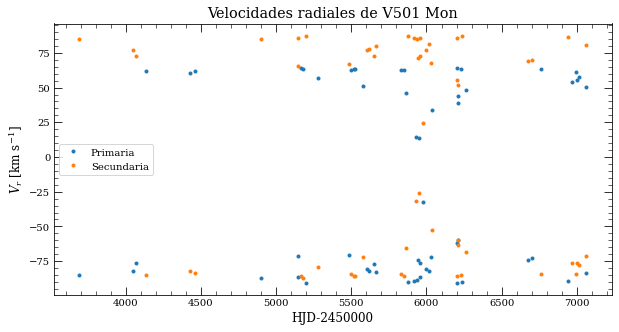

In [30]:
fig = plt.figure(figsize=(10,5))
plt.plot(data.HJD-2450000, data.VR1,
             '.', label='Primaria')
plt.plot(data.HJD-2450000, data.VR2, 
             '.', label='Secundaria')

plt.title('Velocidades radiales de V501 Mon')
plt.xlabel('HJD-2450000')
plt.ylabel(r'$V_r$ [km s$^{-1}$]') # Texto entre $ formato latex
plt.legend(loc='center left')

#### Aquí se encuentra la documentación de [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), [errorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) y [colores](https://matplotlib.org/stable/gallery/color/named_colors.html)

Y ahora vayamos a la práctica.

### Método de Lehmann -- Filhés ###

a) Descargue del  *Classroom* la tabla de velocidad radial ($V_r$) vs. Fecha Juliana Heliocéntrica (HJD) correspondiente al sistema binario V501 Mon (archivo V501Mon.dat). 
Represente gráficamente las observaciones de cada componente ($V_r$ vs. HJD$− 2\,450\,000$) incluyendo las correspondientes 
barras de error.


In [34]:
# comencemos mirando el dataframe con los datos que cargamos
data

HJD    VR1  VR1_err    VR2  VR2_err
0   2.453691e+06 -84.96     0.64  84.73     2.32
1   2.454049e+06 -82.16     0.47  76.84     1.72
2   2.454071e+06 -76.65     0.39  72.80     1.40
3   2.454137e+06  62.18     0.46 -85.06     1.66
4   2.454425e+06  60.25     0.37 -82.04     1.32
5   2.454460e+06  61.68     0.52 -83.79     1.89
6   2.454899e+06 -87.35     0.64  84.93     2.32
7   2.455144e+06 -71.58     0.47  65.89     1.21
8   2.455145e+06 -86.62     0.57  85.43     1.46
9   2.455169e+06  64.13     0.39 -85.34     0.99
10  2.455176e+06  63.21     0.37 -87.01     0.94
11  2.455201e+06 -90.62     0.33  87.24     0.87
12  2.455282e+06  56.67     0.44 -79.47     1.15
13  2.455488e+06 -70.92     0.40  67.22     1.02
14  2.455499e+06  62.34     0.19 -84.27     0.50
15  2.455520e+06  63.23     0.26 -85.74     0.66
16  2.455527e+06  63.28     0.29 -85.92     0.77
17  2.455577e+06  50.83     0.27 -72.13     0.69
18  2.455608e+06 -80.92     0.20  76.89     0.53
19  2.455615e+06 -81.86     0.16  77.84     0.42
20  2.455650e+06 -77.34     0.37  72.76     0.96
21  2.455665e+06 -83.02     0.32  79.65     0.84
22  2.455829e+06  62.55     0.24 -84.16     0.60
23  2.455850e+06  62.98     0.32 -85.49     0.82
24  2.455875e+06 -90.27     0.21  87.02     0.56
25  2.455917e+06 -89.51     0.34  85.94     0.89
26  2.455938e+06 -88.85     0.26  85.18     0.67
27  2.455960e+06 -76.47     0.25  72.75     0.63
28  2.455994e+06 -80.52     0.47  76.80     1.21
29  2.456029e+06 -71.71     0.28  67.36     0.74
30  2.456205e+06 -90.70     0.35  85.60     0.93
31  2.456229e+06  63.71     0.29 -84.82     0.77
32  2.456233e+06 -90.21     0.22  86.87     0.58
33  2.456265e+06  48.45     0.40 -68.25     1.05
34  2.456676e+06 -74.17     0.34  69.32     0.90
35  2.456703e+06 -73.06     0.33  69.63     0.85
36  2.456763e+06  63.31     0.38 -84.58     0.98
37  2.456942e+06 -89.41     0.38  86.42     0.97
38  2.456967e+06  54.31     0.51 -76.07     1.30
39  2.456994e+06  61.31     1.19 -84.06     3.09
40  2.457002e+06  55.14     0.24 -76.03     0.60
41  2.457016e+06  57.27     0.34 -78.09     0.89
42  2.457062e+06 -83.88     0.41  80.67     1.07
43  2.457064e+06  50.46     0.35 -71.42     0.93
44  2.455865e+06  46.10     0.69 -65.50     1.26
45  2.455929e+06  14.40     0.69 -31.70     1.26
46  2.455946e+06 -74.40     0.69  71.40     1.26
47  2.455950e+06  13.40     0.69 -25.70     1.26
48  2.455959e+06 -86.60     0.69  85.70     1.26
49  2.455979e+06 -32.10     0.69  24.70     1.26
50  2.456016e+06 -82.20     0.69  81.60     1.26
51  2.456034e+06  34.10     0.69 -52.40     1.26
52  2.456201e+06  63.90     0.69 -85.80     1.26
53  2.456204e+06 -61.80     0.69  55.20     1.26
54  2.456207e+06  39.10     0.69 -59.60     1.26
55  2.456209e+06  43.60     0.69 -63.70     1.26
56  2.456211e+06 -60.00     0.69  52.10     1.26

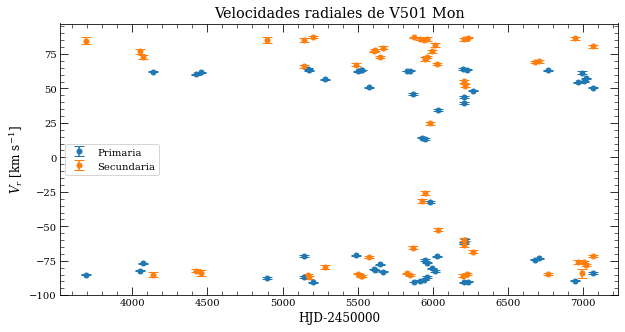

In [36]:
# graficamos los datos, incluyendo barras de error, en función del tiempo
# y la guardamos para usar en el informe

fig = plt.figure(figsize=(10,5))
plt.errorbar(data.HJD-2450000, data.VR1, yerr=data.VR1_err,
             fmt='.', markersize=10, capsize=5, label='Primaria')
plt.errorbar(data.HJD-2450000, data.VR2, yerr=data.VR2_err,
             fmt='.', markersize=10, capsize=5, label='Secundaria')

plt.title('Velocidades radiales de V501 Mon')
plt.xlabel('HJD-2450000')
plt.ylabel(r'$V_r$ [km s$^{-1}$]') # Texto entre $ formato latex
plt.legend(loc='center left')

plt.savefig('vrs.png', dpi=100)  # Para guardar la figura

b) Usando el período orbital (sidéreo) y el instante de paso por el periastro de Torres et al. (2015), Tabla 4, col. *RV + Timings*,
obtenga la fase $\phi$ correspondiente a cada observación.  Represente en un gráfico $V_r$ vs. $\phi$ para las dos componentes del sistema.
Estime visualmente valores razonables de los siguientes parámetros orbitales: velocidad baricentral ($V_0$),  semiamplitud de la curva de velocidad radial ($K$),  excentricidad ($e$) y  argumento del periastro ($\omega$).

c) Para poder aplicar el método de Lehmann -- Filhés, calcule la anomalía excéntrica ($E$) y verdadera ($\nu$)  de cada observación resolviendo la ec. de Kepler. Calcule un primer conjunto de valores teóricos de $V_r$, grafíquelos junto con los observados y calcule el *r.m.s.* de las diferencias $(O-C$).

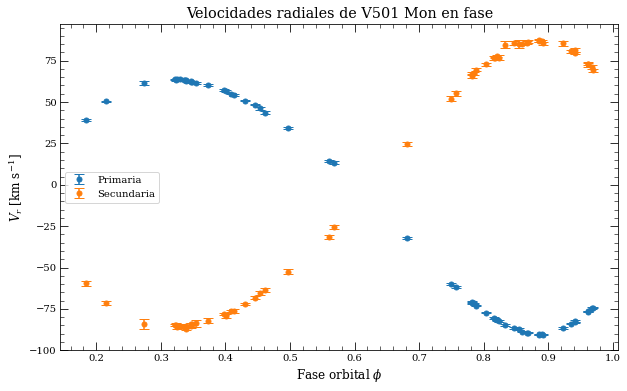

In [7]:
### para graficar necesitamos calcular las fases, y para eso necesitamos cargar el período 
### y el instante del paso por el periastro en variables.
### Buscamos esos datos en el paper de Torres et al. (2015)
### Los valores numéricos que están predefinidos en esta notebook sirven solamente para 
### ilustrar cómo funciona.

P = 1.  # poner el correcto
T0 = 0. # poner el correcto

# definimos una función para calcular la fase
fase =  # definir función 
# la fase también se podría agregar como columna a la tabla

# y ahora graficamos
fig = plt.figure(figsize=(10,6))
# podemos usar plt.errorbar, completando los argumentos correspondientes 

#plt.errorbar(variable_eje_horizontal, variable_eje_vertical, 
#             yerr = columna_datos_error_Vr, fmt='formato_puntos', 
#             markersize = tamaño_puntos, capsize = tamaño_bordes_barra, 
#             label = 'etiqueta_variable')

# hay que crear un comando plt.errorbar para cada variable (Vr primaria y secundaria)
# y buscar títulos adecuados

plt.title('título_gráfico')
plt.xlabel('etiqueta_eje_x')
plt.ylabel(r'etiqueta_eje_y') 
plt.legend(loc='ubicacion_leyenda_variables')
plt.show()
plt.savefig('nombre_archivo_png_salida.png', dpi=100)  

In [8]:
# Ahora teneos que calcular la anomalía excéntrica a partir de la fase orbital.
# Definimos una función para eso, que debe resolver la ec. de Kepler
# luego, calculamos la anomalía verdadera a partir de la anomalía excéntrica 
# con la relación de las tangentes

# la función va a necesitar
# e: excentricidad y
# fase: fase orbital (entre 0 y 1)

# podemos hacerlo iterativamente, creando un bucle (loop) con un comando "while"
# tendremos que definir el grado de precisión que queremos en el valor de E
# y recordar 

# definimos variables auxiliares
# phi: fase orbital en radianes (0<phi<2*pi) 
# E : anomalía excéntrica E (en radianes)
# dE: delta anomalía excentrica (variación entre iteraciones sucesivas)
# cota: cota superior delta anomalía excéntrica (precisión)

# devuelve 
# nu: anomalía verdadera (radianes)

def anomalia(fase, e):
    cota = #elegir_valor    # da la precisión para el cálculo de E
    nu   = 0.              # inicializa anomalía verdadera en cero radianes
    phi  = #poner_formula   # convierte fase orbital a fase orbital angular (intervalo 0, 2*pi)
    E    = #elegir_valor    # inicializa anom. exc. E
    dE   = #elegir_valor    # inicializa delta de anom. exc. 
    while (escribir_condicion):   
            dE = #poner_formula
            E  = E+dE
            
    nu = #poner_formula   # calcular anomalía verdadera con ec. tangentes
    return nu

In [9]:
# Para pasar de fase orbital a anomalía verdadera
# necesitamos una aproximación a la excentricidad
# la obtenemos observando la forma de la curva de Vr
# y asumimos que la estamos estimando con un error un orden de magnitud menor
# de su valor estimado.

e,de = #valor_e, valor_de

## la función "anomalia" (por su criterio lógico) sólo sirve para valores 
## de dimensión 1 (no arrays), por eso creamos una 
## lista cuyos elementos son los resultados de aplicar la función anomalia a "f" y e, 
## donde e es fijo pero f es un valor que itera sobre los elementos de la lista fase. 
## Luego, convertimos esa lista en un array (arreglo) de numpy para poder operar 
## de manera más cómoda en el código.

nu = np.array( [ anomalia(f, e) for f in fase] )



In [10]:
### definimos la función de la velocidad radial, para estimar aproximaciones iniciales a los parámetros que nos faltan

# Vr : velocidad radial
# e: excentricidad
# omega: longitud del periastro en radianes
# nu: anomalia verdadera (radianes)
# K : semiamplitud curva velocidad radial
# V0 : velocidad baricentral

def Vr(nu,K,V0,e,omega):
    return #poner_ecuacion_velocidad_radial



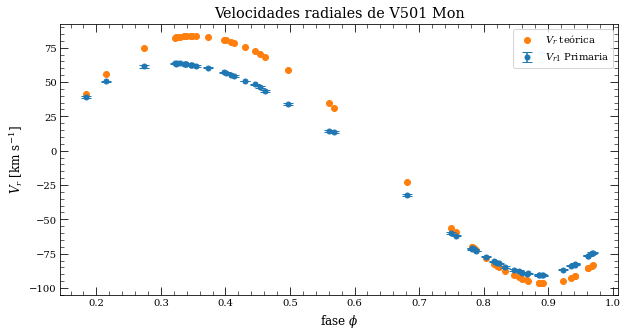

In [11]:
### volvemos a graficar, superponiendo la Vr teórica, 
### calculada con las aproximaciones iniciales

fig = plt.figure(figsize=(10,5))

plt.errorbar(#completar)

# notemos que con sólo mirar el gráfico anterior (Vr observada versus fase), 
# se puede estimar la Vr máxima y mínima y deducir cuánto debe ser aproximadamente K
# de la misma manera, mirando la curva, se puede estimar V0
#
# ahora hacemos varias pruebas para encontrar omega
# K,V0,omega= K_estimada,V0_estimada,omega_estimado

# también debemos estimar los incrementos (deltas) en los parámetros orbitales.
# Los podemos asumir notando un par de cosas:
# los errores en las Vr medidas son siempre del orden de varias décimas de km/s
# y recordando que no podemos pretender obtener K y V0 con errores mucho menores 
# que los errores de las observaciones.
# Para omega, hay que guiarse por la experiencia. 
# Un error del orden del 1% sería maravilloso, pero difícil de lograr.
# Estimar cuánto sería un 1% "razonable" y aprox. "conservador".

# inicializamos 
dK,dV0,domega = #dK_estimado,dV0_estimado,domega

# graficamos
plt.scatter(fase, Vr(nu,K,V0,e,omega),
            #completar_formato_y_etiqueta)

plt.title('titulo')
plt.xlabel('etiqueta eje x')
plt.ylabel(r'etiqueta eje y') 
plt.legend()
plt.show()

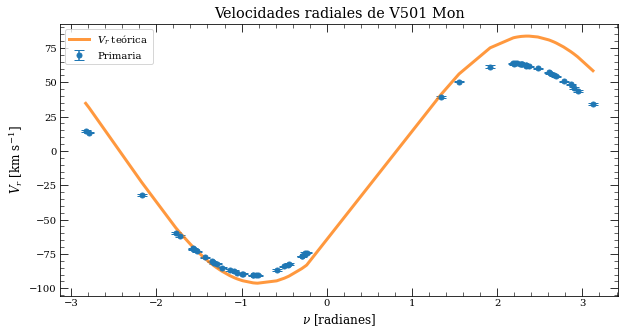

In [12]:
### también podemos trazar la curva contínua y compararla de esa manera con los datos

fig = plt.figure(figsize=(10,5))

plt.errorbar(nu, data.VR1, yerr=data.VR1_err,
             fmt='.', markersize=10, capsize=5, label='Primaria')

## podemos hacer un plot continuo si ordenamos los nu
plt.plot(np.sort(nu),Vr(np.sort(nu),K,V0,e,omega),c='C1',label='$V_r$ teórica',lw=3,alpha=.8)

## Así se ve un mejor la variación.
## Pero hay que tener cuidado con guardarlo como variable así ordenado, porque no van a coincidir punto por punto los arrays y el
## residuo puede dar cualquier cosa

plt.title('Velocidades radiales de V501 Mon')
plt.xlabel(r'$\nu$ [radianes]')
plt.ylabel(r'$V_r$ [km s$^{-1}$]')
plt.legend()
plt.show()

In [13]:
#  pasamos la velocidad radial teórica a una variable fija 
Vr_t = Vr(nu,K,V0,e,omega)

# y ahora calculamos los (O-C)
# se suele llamar "residuos" a las diferencias (O-C), o sea "Observado menos calculado" 
residuo = data.VR1 - Vr_t

# calculamos el r.m.s. de los (O-C). Es una métrica que usamos para verificar 
# si el (O-C) disminuye
# en las sucesivas iteraciones. Este sería el valor inicial.
n = len(residuo)
rms = #poner_formula
print('r.m.s. de (O-C) =', rms)


r.m.s. de (O-C) = 14.917379603174362


d) Evalúe las derivadas parciales del primer orden de la serie de Taylor de $\Delta V_r$ y estime los incrementos en los parámetros orbitales ($\Delta V_0$, $\Delta K$... etc.). 
Calcule las correcciones diferenciales a los parámetros orbitales y corrija con ellas las estimaciones iniciales de los parámetros ($V_0$, $K$... etc.).

In [14]:
# Recordemos que el cambio en Vr debido a un cambio (delta) en los parámetros orbitales 
# puede pensarse como una función 
# de las derivadas primeras de Vr respecto a los parámetros orbitales
# Definimos esa función Delta Vr.
# Asumimos que los ángulos vienen dados en radianes
# suponemos que P y T0 son fijos, por tanto sus derivadas son nulas y no las incluimos

def DeltaV(nu, dK, de, domega, dV0):
    # calculamos las derivadas parciales de f = DeltaV
    dfdK = # poner fórmula (ver teoría)
    dfde = # poner fórmula (ver teoría) 
    dfdomega = # poner fórmula (ver teoría) 
    Delta_V = # poner fórmula (ver teoría)
    return Delta_V


In [15]:
# Ahora calculamos las variaciones en los parámetros orbitales 
# (o sea las correcciones diferenciales)
# Para eso hacemos un ajuste de minimos cuadrados usando curve_fit 
# Notar que aquí la función de ajuste es DeltaV, la variable independiente "nu" 
# y los valores a ajustar son los residuos

deltas, cov = curve_fit(# funcion de ajuste, variable independiente, variable dependiente)
coef_err = np.sqrt(np.diag(cov))  ### los errores de los coeficientes ajustados (deltas)
                                  ### son la raíz cuadrada de los elementos de la diagonal

print('Deltas (correcciones) en K, e, omega, V0')
print(deltas)
print('Errores en Delta K, Delta e, Delta omega, Delta V0')
print(coef_err)
print('Matriz de covarianza:')
print(cov)

Deltas (correcciones) en K, e, omega, V0
[-13.85043591   0.02776238   0.10675547  -7.13988368]
Errores en Delta K, Delta e, Delta omega, Delta V0
[0.08175505 0.00137982 0.00193396 0.08722096]
Matriz de covarianza:
[[6.68388818e-03 2.96005790e-05 2.21858726e-06 1.54854595e-03]
 [2.96005790e-05 1.90389518e-06 1.06129925e-06 6.92158017e-05]
 [2.21858726e-06 1.06129925e-06 3.74021859e-06 6.55201226e-05]
 [1.54854595e-03 6.92158017e-05 6.55201226e-05 7.60749531e-03]]


In [16]:
### primera iteración MANUAL para que se entienda el proceso

### los nuevos valores son los viejos más la corrección
K_     = K     + deltas[0]
e_     = e     + deltas[1]
omega_ = omega + deltas[2]
V0_    = V0    + deltas[3]

print('K1, e1, omega1, gamma1', K_, e_, omega_, V0_)

### volvemos a calcular las anomalías verdaderas

nu_ = np.array( [ anomalia(f, e_) for f in fase] )

# volvemos a calcular las velocidades teóricas

Vr_t_ = Vr(nu_,K_,V0_,e_,omega_)

# y ahora calculamos un array con los nuevos residuos (O-C)
residuo_ = data.VR1 - Vr_t_

# Calculamos el error "medio". Esto es, el r.m.s. de los errores reportados por 
# los autores de las medidas. 
# Usamos esto para ver si el proceso ya nos da residuos menores que 
#los errores observacionales.

VR1_err_rms = #poner formula
print('r.m.s. de errores en VR primaria = ', VR1_err_rms)

# calculamos el r.m.s. de los nuevos (O-C)
rms_ = #poner formula
print('r.m.s. de (O-C) corregidos =', rms_)

#chequear si los residuos disminuyen

K1, e1, omega1, gamma1 76.14956408822653 0.1277623849807425 4.033746290103535 -7.1398836806583885
r.m.s. de errores en VR primaria =  0.48991048233504286
r.m.s. de (O-C) corregidos = 0.9338489368065521


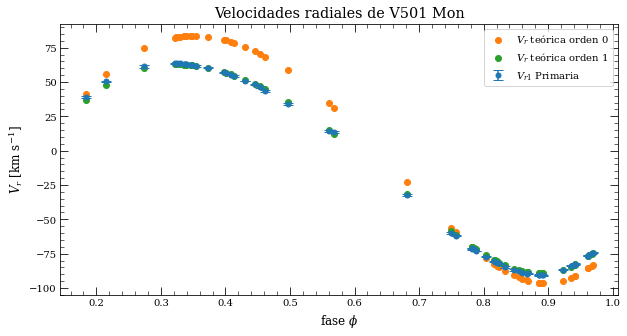

Text(0, 0.5, '$\\left|O-C\\right|$')

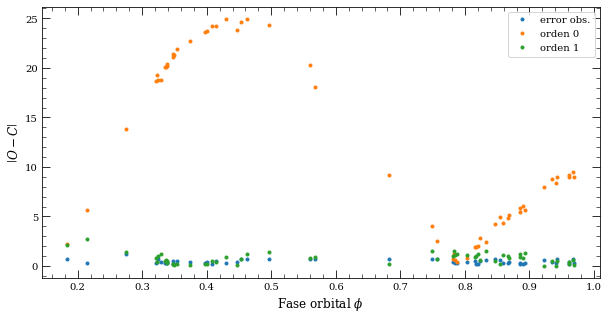

In [17]:
# A continuación podemos ver gráficamente la convergencia. 
# error obs. son los errores reportados por los autores del paper.
# orden 0 es la estimación inicial y orden 1 el resultado de la primera iteración
# Las leyendas "orden 0" y "orden 1" indican los residuos de las aproximaciones.

fig = plt.figure(figsize=(10,5))

plt.errorbar(fase, data.VR1, yerr=data.VR1_err,
             #completar formato puntos, tamaños, etiqueta)

plt.scatter(fase,Vr_t, #completar)

plt.scatter(fase,Vr_t_, #completar)

plt.title('título gráfico')
plt.xlabel('título eje x')
plt.ylabel(r'título eje y') 
plt.legend()
plt.show()

# otro gráfico para ver cómo evoluciona la convergencia            
plt.figure(figsize=(10,5))
plt.plot(fase, abs(data.VR1_err), #completar)
plt.plot(fase,abs(residuo), #completar)
plt.plot(fase,abs(residuo_), #completar)
plt.legend()
plt.xlabel('título')
plt.ylabel(r'título')

## Observar si los residuos son aleatorios o si tienen "estructura" 
## Y si son del orden del error observacional o no.

e) Itere los pasos anteriores hasta que el *r.m.s.* de las diferencias $(O-C)$ 
sea similar al *r.m.s.* de los errores en las mediciones de $V_{r,1}$ reportados por
Torres et al. (2015).
Muestre gráficamente la convergencia.

In [18]:
### Como podríamos llegar a necesitar muchas más iteraciones para encontrar un buen ajuste,
### vamos a definir una manera de hacerlo automáticamente.

### daremos un nro límite de iteraciones y una tolerancia
### una manera de medir que se hizo un buen ajuste es comparando los residuos (O-C)
### con el error observacional.
### Pediremos que el módulo de la diferencia entre el rms de los residuos y el error medio
### asociado a los datos sea menor a 0.005

tolerancia = #completar
lim= 100.  # nro. límite de iteraciones
K_,e_,omega_,V0 = K,e,omega,V0   # valor inicial de los parámetros

i=0  # contador de iteraciones
flag= True

while flag:
    i+=1
    ### los nuevos valores son los viejos más la corrección
    K_     = K_     + deltas[0]
    e_     = e_     + deltas[1]
    omega_ = omega_ + deltas[2]
    V0_    = V0_    + deltas[3]

    ### volvemos a calcular las anomalías verdaderas
    nu_ = np.array( [ anomalia(f, e_) for f in fase] )

    # volvemos a calcular las velocidades teóricas
    Vr_t_=Vr(nu_,K_,V0_,e_,omega_)

    # y ahora calculamos un array con los nuevos residuos (O-C)
    residuo_ = #completar

    # calculamos el r.m.s. de los nuevos residuos (O-C)
    rms_ = #completar
    
    ## evaluamos si se cumple o no el criterio de corte.
    ## si no se cumple seguiremos iterando.
    criterio = np.abs(rms_-VR1_err_rms ) < tolerancia 
    
    if ((i>=lim) | criterio) :
        flag = False
    else:
        deltas, cov = curve_fit(DeltaV, nu_, residuo_)
        coef_err = np.sqrt(np.diag(cov)) 
    
print('Iteraciones:',i)
print('r.m.s. de los residuos (O-C) =',rms_)

Iteraciones: 2
r.m.s. de los residuos (O-C) = 0.4914246113277462


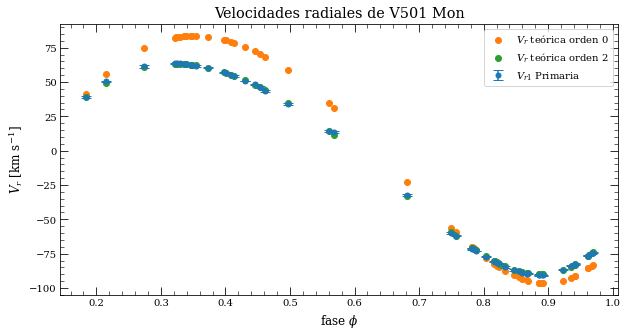

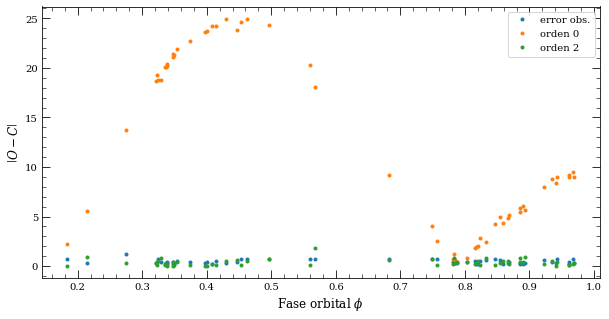

In [19]:
### graficamos el modelo teórico con los valores finales de los parámetros

fig = plt.figure(figsize=(10,5))

plt.errorbar(fase, data.VR1, yerr=data.VR1_err,
             #completar)

plt.scatter(fase,Vr_t, #completar)

plt.scatter(fase,Vr_t_,c='C2',label='$V_r$ teórica orden '+str(i))

plt.title('titulo')
plt.xlabel('eje x')
plt.ylabel(r'eje y') 
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(fase, abs(data.VR1_err), #completar)
plt.plot(fase,abs(residuo), #completar)
plt.plot(fase,abs(residuo_), #completar)
plt.legend()
plt.xlabel('eje x')
plt.ylabel(r'eje y')
plt.show()



In [20]:
# mostramos los valores finales de los parámetros orbitales
# estimando los errores como si fueran iguales a los incrementos asumidos al ajustar
# la función DeltaV
print('valores finales de los parámetros')
print('V_0 =', round(V0_, 1), '+/-', dV0, 'km/s')
print('K_1 =', #completar)
print('e =', #completar)
print('omega_1 =', #completar)

valores finales de los parámetros
V_0 = -7.0 +/- 0.1 km/s
K_1 = 76.6 +/- 0.1 km/s
e = 0.13 +/- 0.01
omega_1 = 232.2 +/- 5.7 grados


f) Utilice las expresiones deducidas en la teoría para obtener el semieje proyectado de la órbita de la componente primaria ($a_1 \sin i$) y la función de masa del sistema
$[f(M)]$.

In [21]:
# el K del que hablamos hasta ahora sería el de la primaria
# por tanto lo asignamos a una nueva variable K1
K1 = K_
# calculamos el semieje mayor proyectado de la órbita absoluta de la primaria
a1sini = #completar

# lo mostramos en distintas unidades: kilómetros, radios solares... lo que les parezca
print('a_1 sen(i) =' #completar)

# calculamos la función de masa del sistema
# recordemos que para eso hay que cambiar las unidades

fm = #poner formula
print('f(M) =' #completar)

a_1 sen(i) = 7.36 x 10^6 km =  10.52 Rsol
f(M) = 0.32 M_sol


2. Si le aplicáramos a los datos de velocidad radial de la componente secundaria el mismo procedimiento que le hemos aplicado a la primaria ¿podríamos obtener algún parámetro orbital que hasta ahora no calculamos?
¿Obtendríamos alguna información adicional acerca de las masas?

3. Usando las propiedades de la descripción del sistema binario en el marco de referencia de su centro de masa obtenga el cociente de masas $q = M_2 / M_1$. Luego, utilizando $q$ y los resultados del ejercicio 1., obtenga $K_2$, $a_2 \sin i$ y las masas mínimas de las estrellas componentes del sistema.


Text(0, 0.5, '$V_{r,1}$ [km s$^{-1}$]')

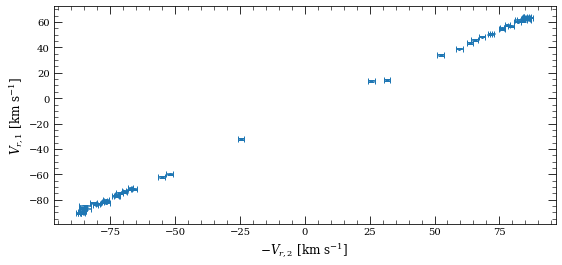

In [22]:
# para obtener q primero graficamos ...

fig = plt.figure(figsize=(9,4))

plt.errorbar(#elegir variables adecuadas)

plt.xlabel('eje x')
plt.ylabel('eje y') 


In [23]:
# ahora ajustamos una recta a esos datos
# para eso primero definimos la función que vamos a ajustar

def f_q(x, m, n):
    'función lineal'
    f_q = m * x + n
    return f_q 

# luego hacemos el ajuste usando curve_fit
coef_q, cov_q = curve_fit(# funcion de ajuste, variable independiente, 
    #variable dependiente, sigma=peso)
coef_err_q = np.sqrt(np.diag(cov_q))  

print('Coeficientes recta m,n')
print(coef_q)
print('Errores en m y n:')
print(coef_err_q)
print('Matriz de covarianza:')
print(cov_q)
print('por tanto q =' #completar)

Coeficientes recta m,n
[  0.88770607 -12.53727674]
Errores en m y n:
[0.00145644 0.11409187]
Matriz de covarianza:
[[2.12121179e-06 1.79153931e-05]
 [1.79153931e-05 1.30169558e-02]]
por tanto q = 0.8877 +/- 0.0015


In [24]:
# nos interesa la pendiente de la recta m = q
q = #completar

# ahora calculamos K2
K2 = #completar

# el semieje proyectado de la órbita de la secundaria:
a2sini = #completar

# para calcular las masas mínimas
# cambiamos las unidades de modo adecuado

m1sen3i = #completar

m2sen3i = #completar

print('q =', #completar)
print('a_2 sen(i) =', #completar )
print('M_1 sen³(i) = ', #completar)
print('M_2 sen³(i) = ', #completar)


q = 0.888 , K_2 =  86.33 km/s
a_2 sen(i) = 8.29 x 10^6 km = 11.85 R_sol
M_1 sen³(i) =  1.63 M_sol
M_2 sen³(i) =  1.44 M_sol
